# Inductive bias

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

import sys 
from importlib import reload
sys.path.append("..//Experiment1")
import E1_Functions as func

# Define a discrete color palette with a specified number of colors
#sns.set_palette(sns.color_palette("muted", n_colors=10))  # or use another color map and adjust `n_colors`
custom_palette = ["#FFB347", "#779ECB", "#77DD77", "#FF6961", "#CB99C9", "#FDFD96", "#AEC6CF"]
costum_palette_pairs = ['#ffb347', '#ffcc84', '#ffe6c2', 
                        '#779ecb', '#a4bedc', '#d2dfee', 
                        '#77dd77', '#a4e8a4', '#d2f4d2', 
                        '#ff6961', '#ff9b96', '#ffcdca', 
                        '#cb99c9', '#dcbbdb', '#eedded', 
                        '#fdfd96', '#fefeb9', '#fefedc',
                        '#aec6cf', '#c9d9df', '#e4ecef']

sns.set_palette(custom_palette)
colors = sns.color_palette()
colors_pairs = sns.color_palette(costum_palette_pairs) #("tab20c")

# set title font size
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10

# Enable LaTeX font rendering
#plt.rcParams.update({
#    "text.usetex": True,            # Use LaTeX for all text
#    "font.family": "serif",         # Set the font family to serif (LaTeX default)
#    "font.serif": ["Computer Modern"]  # Use Computer Modern font (LaTeX default font)
#})


In [145]:
save_results = False
save_plots = False

In [146]:
def generate_data(num_points, noise_std = 0.3, n_waves = 15, shifted=False):

    train_x = np.linspace(-n_waves * np.pi, n_waves * np.pi, num_points)        # E1 + E2
    train_y = np.cos(train_x)+ np.random.normal(0, noise_std, num_points)
    

    if shifted: # E2
        test_x = np.linspace(n_waves * np.pi, 5 * n_waves * np.pi, 100)        
        test_y = np.cos(test_x) #+ np.random.normal(0, noise_std, 100)

        

    else: #E1
        test_x = np.linspace(-n_waves * np.pi, n_waves * np.pi, 100)   # E1
        #test_x = np.linspace(0, 2 * n_waves * np.pi, 100)              # E2
        test_y = np.cos(test_x)


    return train_x, train_y, test_x, test_y 

    

def plot_data_example(train_x, train_y, test_x, test_y):
    plt.figure(figsize=(7, 3))
    plt.plot(train_x, train_y, label='Train data', marker='o', ls='', color='grey', ms=5)
    plt.plot(test_x, test_y, label='Test data', marker='o', ls='-', color='black', ms=3)
    plt.legend(loc='upper right', frameon=True, markerfirst=False, ncols=2)
    # make xtcks in multiples of pi
    plt.xticks(np.arange(-5, 30, 5)*np.pi, labels=[f"${i}\pi$" for i in np.arange(-5, 30, 5)])
    plt.xlabel("x")
    plt.ylabel("y")
    plt.tight_layout()

# Example

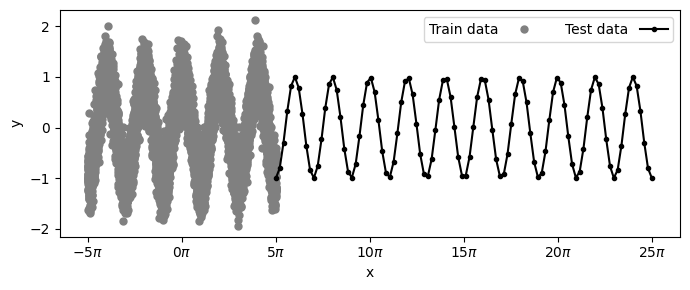

In [147]:
# Parameters for sine wave dataset
num_points = 10000
noise_std = 0.3

n_waves = 5 #6

# Generate data
train_x_array, train_y_array, test_x_array, test_y_array = generate_data(num_points, noise_std, n_waves, shifted=True)

# Plot an example sample
plot_data_example(train_x_array, train_y_array, test_x_array, test_y_array)

In [148]:
# TRAIN MODEL
input_size, hidden_sizes, output_size = 1, [64, 64], 1
batch_size = 25
print_every = 300
lr = 0.01

# Convert data to tensors and create dataloaders
train_x, train_y, test_x, test_y = func.convert_to_tensor(train_x_array, train_y_array, test_x_array, test_y_array)
train_loader = func.create_dataloader(train_x, train_y, batch_size=batch_size)

# ReLU training

In [149]:
###### ReLUMLP ######
num_epochs = 100

ReLU_train_pred = []
ReLU_test_pred = []

for i in range(10):
    ReLuMLP = func.ReLUMLP(input_size, hidden_sizes, output_size)
    model_ReLUMLP, train_losses_MLP, val_losses_MLP = func.train_model(ReLuMLP, train_loader, test_x, test_y, lr, num_epochs=num_epochs, print_every=print_every)

    model_ReLUMLP.eval()
    with torch.no_grad():
        train_pred = model_ReLUMLP(train_x).numpy().squeeze()
        test_pred = model_ReLUMLP(test_x).numpy().squeeze()
        ReLU_train_pred.append(train_pred)
        ReLU_test_pred.append(test_pred)

    #fig, ax = plt.subplots(1, 1, figsize=(6, 3))
    #ax.plot(train_losses_MLP, label='ReLU train', color=colors[0])
    #ax.plot(val_losses_MLP, label='ReLU validation', ls = '--', color=colors[0], alpha=0.5)
    #ax.set_xlabel('Epoch')
    #ax.set_ylabel('Loss')
    #ax.set_xscale('log')
    #ax.set_yscale('log')
    #ax.legend(loc='lower left', frameon=False, ncols=4)
    #ax.set_xlim(1, num_epochs)
    ##ax.set_ylim(1e-3, 1e2)
    #plt.tight_layout()


# Tanh training

In [150]:
###### TanhMLP ######
num_epochs = 100

Tanh_train_pred = []
Tanh_test_pred = []

for i in range(10):
    TanhMLP = func.TanhMLP(input_size, hidden_sizes, output_size)
    model_TanhMLP, train_losses_TanhMLP, val_losses_TanhMLP = func.train_model(TanhMLP, train_loader, test_x, test_y, lr, num_epochs=num_epochs, print_every=print_every)

    model_TanhMLP.eval()
    with torch.no_grad():
        train_pred = model_TanhMLP(train_x).numpy().squeeze()
        test_pred = model_TanhMLP(test_x).numpy().squeeze()
        Tanh_train_pred.append(train_pred)
        Tanh_test_pred.append(test_pred)
        
    #fig, ax = plt.subplots(1, 1, figsize=(6, 3))
    #ax.plot(train_losses_TanhMLP, label='Tanh train', color=colors[1])
    #ax.plot(val_losses_TanhMLP, label='Tanh validation', ls = '--', color=colors[1], alpha=0.5)
    #ax.set_xlabel('Epoch')
    #ax.set_ylabel('Loss')
    #ax.set_xscale('log')
    #ax.set_yscale('log')
    #ax.legend(loc='lower left', frameon=False, ncols=4)
    #ax.set_xlim(1, num_epochs)
    ##ax.set_ylim(1e-3, 1e2)
    #plt.tight_layout()

# Sine training

In [151]:
###### SineMLP ######
num_epochs = 100

Sine_train_pred = []
Sine_test_pred = []

for i in range(10):
    SineMLP = func.SineMLP(input_size, hidden_sizes, output_size)
    model_SineMLP, train_losses_SineMLP, val_losses_SineMLP = func.train_model(SineMLP, train_loader, test_x, test_y, lr, num_epochs=num_epochs, print_every=print_every)

    model_SineMLP.eval()
    with torch.no_grad():
        train_pred = model_SineMLP(train_x).numpy().squeeze()
        test_pred = model_SineMLP(test_x).numpy().squeeze()
        Sine_train_pred.append(train_pred)
        Sine_test_pred.append(test_pred)

    #fig, ax = plt.subplots(1, 1, figsize=(6, 3))
    #ax.plot(train_losses_SineMLP, label='Sine train', color=colors[2])
    #ax.plot(val_losses_SineMLP, label='Sine validation', ls = '--', color=colors[2], alpha=0.5)
    #ax.set_xlabel('Epoch')
    #ax.set_ylabel('Loss')
    #ax.set_xscale('log')
    #ax.set_yscale('log')
    #ax.legend(loc='lower left', frameon=False, ncols=4)
    #ax.set_xlim(1, num_epochs)
    ##ax.set_ylim(1e-3, 1e2)
    #plt.tight_layout()

# Snake training

In [152]:
###### SnakeMLP ######
num_epochs = 100

snake_train_pred = []
snake_test_pred = []

for i in range(10):
    SnakeMLP = func.SnakeMLP(input_size, hidden_sizes, output_size)
    model_SnakeMLP, train_losses_SnakeMLP, val_losses_SnakeMLP = func.train_model(SnakeMLP, train_loader, test_x, test_y, lr, num_epochs=num_epochs, print_every=print_every)

    model_SnakeMLP.eval()
    with torch.no_grad():
        train_pred = model_SnakeMLP(train_x).numpy().squeeze()
        test_pred = model_SnakeMLP(test_x).numpy().squeeze()
        snake_train_pred.append(train_pred)
        snake_test_pred.append(test_pred)

    #fig, ax = plt.subplots(1, 1, figsize=(10, 4))
    #ax.plot(train_losses_SnakeMLP, label='Snake train', color=colors[3])
    #ax.plot(val_losses_SnakeMLP, label='Snake validation', ls = '--', color=colors[3], alpha=0.5)
    #ax.set_xlabel('Epoch')
    #ax.set_ylabel('Loss')
    #ax.set_xscale('log')
    #ax.set_yscale('log')
    #ax.legend(loc='lower left', frameon=False, ncols=4)
    #ax.set_xlim(1, num_epochs)
    ##ax.set_ylim(1e-3, 1e2)
    #plt.tight_layout()

# PINN training

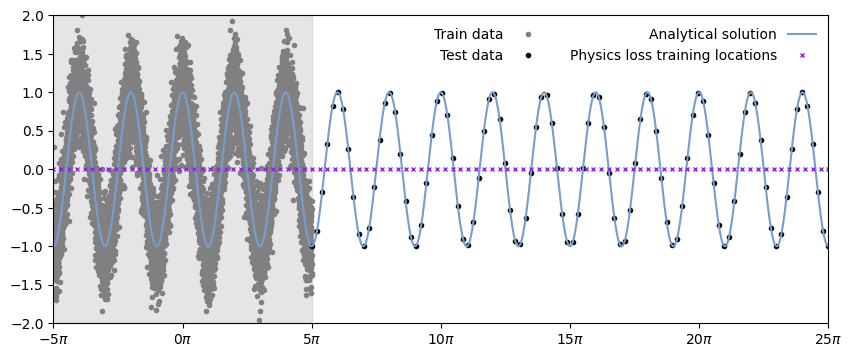

In [260]:
# Helper Functions
def oscillator(d, w0, x):
    """Analytical solution to the 1D underdamped harmonic oscillator."""
    assert d < w0, "Damping coefficient must be less than angular frequency for underdamped motion."
    w = np.sqrt(w0**2 - d**2)
    phi = np.arctan(-d / w)
    A = 1 / (2 * np.cos(phi))
    y = torch.exp(-d * x) * 2 * A * torch.cos(phi + w * x)
    return y

d, w0 = 0, 1
mu, k = 2*d, w0**2
N_total = 200
N_train = 100
N_physics = 100
N = int(N_total/N_train/2)

# plot analytical solution on top of training data
x = torch.linspace(-n_waves * np.pi, 5 * n_waves * np.pi, num_points)
x_physics = torch.linspace(-n_waves * np.pi, 5 * n_waves * np.pi, N_physics).requires_grad_(True)
y = oscillator(d, w0, x)


fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(train_x_array, train_y_array, label='Train data', color='grey', marker='o', ms=3, ls='')
ax.plot(test_x_array, test_y_array, label='Test data', color='black', marker='o', ms=3, ls='')
ax.plot(x, y, label='Analytical solution', color=colors[1])
ax.plot(x_physics.detach().numpy(), torch.zeros_like(x_physics), label='Physics loss training locations', color='blueviolet', marker='x', ms=3, ls='')
ax.legend(loc='upper right', frameon=False, markerfirst=False, ncols=2)
ax.axvspan(-5 * np.pi, 5 * np.pi, color='grey', alpha=0.2)
ax.set_xlim(-5 * np.pi, 25 * np.pi)
ax.set_ylim(-2, 2.)
ax.set_xticks(np.arange(-5, 26, 5)*np.pi, labels=[f"${i}\pi$" for i in np.arange(-5, 26, 5)])
plt.show()

In [165]:
x_physics.view(-1, 1).shape

torch.Size([100, 1])

In [166]:
N_train_pinn = num_points-N_physics 
print(N_train_pinn)
train_x_array_pinn, train_y_array_pinn, _, _ = generate_data(N_train_pinn, noise_std, n_waves, shifted=True)
train_x_pinn, train_y_pinn, _, _ = func.convert_to_tensor(train_x_array_pinn, train_y_array_pinn, test_x_array, test_y_array)
train_loader_pinn = func.create_dataloader(train_x_pinn, train_y_pinn, batch_size=batch_size)

###### PINN ######
num_epochs = 100

pinn_train_pred = []
pinn_test_pred = []

for i in range(10):
    model = func.SnakeMLP(input_size, hidden_sizes, output_size)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    criterion = nn.MSELoss()

    x_physics = x_physics.view(-1, 1)

    

    with tqdm(total=num_epochs) as pbar:
        for step in range(num_epochs):
            model.train()
            for inputs, targets in train_loader_pinn:
                optimizer.zero_grad()

                # Data Loss
                outputs_data = model(inputs)
                loss_data = criterion(outputs_data, targets)
                # Physics Loss
                outputs_physics = model(x_physics)
                dx = torch.autograd.grad(outputs_physics, x_physics, torch.ones_like(outputs_physics), create_graph=True)[0]
                dx2 = torch.autograd.grad(dx, x_physics, torch.ones_like(dx), create_graph=True)[0]
                physics = dx2 + mu * dx + k * outputs_physics
                loss_physics = 1e-4 * torch.mean(physics**2)
                
                # Total Loss
                loss = loss_data + loss_physics
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
            
            # Update Progress Bar
            pbar.update(1)

    # Evaluation
    with torch.no_grad():
        model.eval()
        y_pred_train = model(train_x_pinn).detach().numpy()
        y_pred_test = model(test_x).detach().numpy()
        pinn_train_pred.append(y_pred_train)
        pinn_test_pred.append(y_pred_test)

9900


100%|██████████| 100/100 [01:04<00:00,  1.54it/s]


# Results

In [168]:
mean = pd.DataFrame(columns=['ReLU', 'Tanh', 'Sine', 'Snake', 'PINN'], index=['Train', 'Test'])
std = pd.DataFrame(columns=['ReLU', 'Tanh', 'Sine', 'Snake', 'PINN'], index=['Train', 'Test'])

mean.loc['Train', 'ReLU'] = np.mean(ReLU_train_pred, axis=0)
mean.loc['Test', 'ReLU'] = np.mean(ReLU_test_pred, axis=0)

mean.loc['Train', 'Tanh'] = np.mean(Tanh_train_pred, axis=0)
mean.loc['Test', 'Tanh'] = np.mean(Tanh_test_pred, axis=0)

mean.loc['Train', 'Sine'] = np.mean(Sine_train_pred, axis=0)
mean.loc['Test', 'Sine'] = np.mean(Sine_test_pred, axis=0)

mean.loc['Train', 'Snake'] = np.mean(snake_train_pred, axis=0)
mean.loc['Test', 'Snake'] = np.mean(snake_test_pred, axis=0)

mean.loc['Train', 'PINN'] = np.mean(pinn_train_pred, axis=0).squeeze()
mean.loc['Test', 'PINN'] = np.mean(pinn_test_pred, axis=0).squeeze()

std.loc['Train', 'ReLU'] = np.std(ReLU_train_pred, axis=0)
std.loc['Test', 'ReLU'] = np.std(ReLU_test_pred, axis=0)

std.loc['Train', 'Tanh'] = np.std(Tanh_train_pred, axis=0)
std.loc['Test', 'Tanh'] = np.std(Tanh_test_pred, axis=0)

std.loc['Train', 'Sine'] = np.std(Sine_train_pred, axis=0)
std.loc['Test', 'Sine'] = np.std(Sine_test_pred, axis=0)

std.loc['Train', 'Snake'] = np.std(snake_train_pred, axis=0)
std.loc['Test', 'Snake'] = np.std(snake_test_pred, axis=0)

std.loc['Train', 'PINN'] = np.std(pinn_train_pred, axis=0).squeeze()
std.loc['Test', 'PINN'] = np.std(pinn_test_pred, axis=0).squeeze()


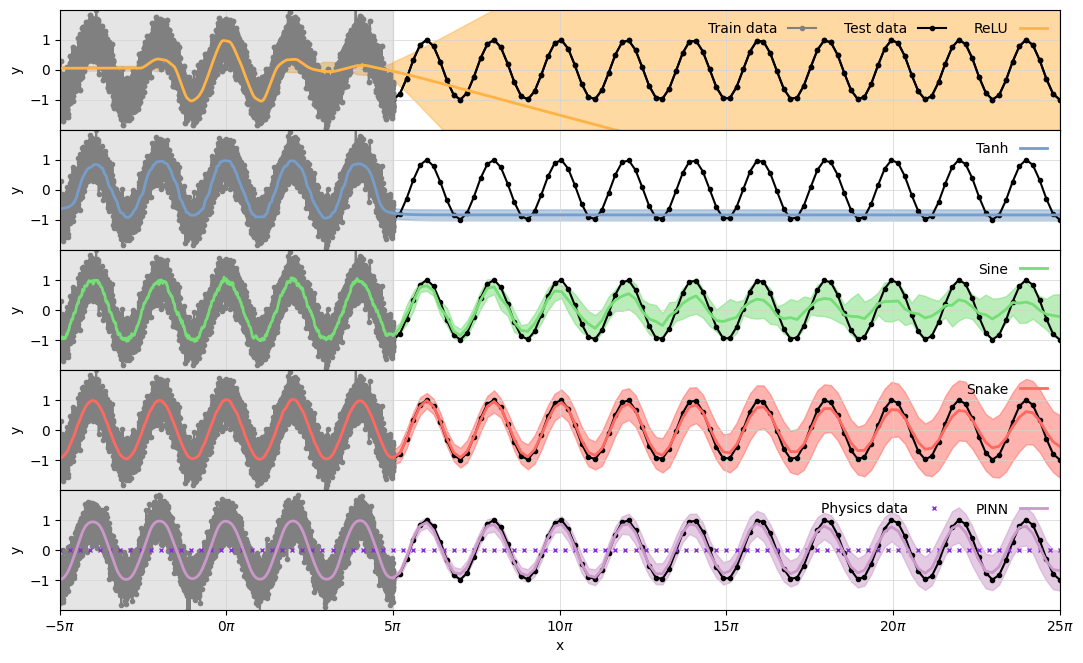

In [237]:
# PLOT RESULTS
# Create a figure and specify GridSpec
fig, axes = plt.subplots(5, 1, figsize=(10, 6), sharex=True) #, gridspec_kw={'height_ratios': [2, 1]})

axes[0].plot(train_x_array, train_y_array, label='Train data', color='grey', marker='o', ms=3, ls='-')
axes[0].plot(test_x_array, test_y_array, label='Test data', color='black', marker='o', ms=3, ls='-')

# only first four axes
for ax in axes:
    ax.grid(True, color='lightgrey', linestyle='-', linewidth=0.5)
    ax.plot(test_x_array, test_y_array, color='black', marker='o', ms=3, ls='-')

for ax in axes[:4]:
    ax.plot(train_x_array, train_y_array, color='grey', marker='o', ms=3, ls='-')

lw = 2
alpha = 0.5

axes[0].plot(train_x_array, mean.loc['Train', 'ReLU'], label='ReLU', color=colors[0], lw=lw)
axes[0].fill_between(train_x_array, mean.loc['Train', 'ReLU'] - std.loc['Train', 'ReLU'], mean.loc['Train', 'ReLU'] + std.loc['Train', 'ReLU'], color=colors[0], alpha=alpha) 
axes[0].plot(test_x_array, mean.loc['Test', 'ReLU'], color=colors[0], ls='-', lw=lw)
axes[0].fill_between(test_x_array, mean.loc['Test', 'ReLU'] - std.loc['Test', 'ReLU'], mean.loc['Test', 'ReLU'] + std.loc['Test', 'ReLU'], color=colors[0], alpha=alpha)

axes[1].plot(train_x_array, mean.loc['Train', 'Tanh'], label='Tanh', color=colors[1], lw=lw)
axes[1].fill_between(train_x_array, mean.loc['Train', 'Tanh'] - std.loc['Train', 'Tanh'], mean.loc['Train', 'Tanh'] + std.loc['Train', 'Tanh'], color=colors[1], alpha=alpha)
axes[1].plot(test_x_array, mean.loc['Test', 'Tanh'], color=colors[1], ls='-', lw=lw)
axes[1].fill_between(test_x_array, mean.loc['Test', 'Tanh'] - std.loc['Test', 'Tanh'], mean.loc['Test', 'Tanh'] + std.loc['Test', 'Tanh'], color=colors[1], alpha=alpha)

axes[2].plot(train_x_array, mean.loc['Train', 'Sine'], label='Sine', color=colors[2], lw=lw)
axes[2].fill_between(train_x_array, mean.loc['Train', 'Sine'] - std.loc['Train', 'Sine'], mean.loc['Train', 'Sine'] + std.loc['Train', 'Sine'], color=colors[2], alpha=alpha)
axes[2].plot(test_x_array, mean.loc['Test', 'Sine'], color=colors[2], ls='-', lw=lw)
axes[2].fill_between(test_x_array, mean.loc['Test', 'Sine'] - std.loc['Test', 'Sine'], mean.loc['Test', 'Sine'] + std.loc['Test', 'Sine'], color=colors[2], alpha=alpha)

axes[3].plot(train_x_array, mean.loc['Train', 'Snake'], label='Snake', color=colors[3], lw=lw)
axes[3].fill_between(train_x_array, mean.loc['Train', 'Snake'] - std.loc['Train', 'Snake'], mean.loc['Train', 'Snake'] + std.loc['Train', 'Snake'], color=colors[3], alpha=alpha)
axes[3].plot(test_x_array, mean.loc['Test', 'Snake'], color=colors[3], ls='-', lw=lw)
axes[3].fill_between(test_x_array, mean.loc['Test', 'Snake'] - std.loc['Test', 'Snake'], mean.loc['Test', 'Snake'] + std.loc['Test', 'Snake'], color=colors[3], alpha=alpha)

axes[4].plot(train_x_array_pinn, train_y_array_pinn, color='grey', marker='o', ms=3, ls='-')
axes[4].plot(x_physics.detach().numpy(), torch.zeros_like(x_physics), label='Physics data', color='blueviolet', marker='x', ms=3, ls='')
axes[4].plot(train_x_array_pinn, mean.loc['Train', 'PINN'], label='PINN', color=colors[4], lw=lw)
axes[4].fill_between(train_x_array_pinn, mean.loc['Train', 'PINN'] - std.loc['Train', 'PINN'], mean.loc['Train', 'PINN'] + std.loc['Train', 'PINN'], color=colors[4], alpha=alpha)
axes[4].plot(test_x_array, mean.loc['Test', 'PINN'], color=colors[4], ls='-', lw=lw)
axes[4].fill_between(test_x_array, mean.loc['Test', 'PINN'] - std.loc['Test', 'PINN'], mean.loc['Test', 'PINN'] + std.loc['Test', 'PINN'], color=colors[4], alpha=alpha)

# plot physics data

for ax in axes:
    #ax.vlines(5*np.pi, -2, 2, color='black', ls='--', lw=1)
    ax.set_xlim(-5 * np.pi, 25 * np.pi)
    ax.set_ylim(-2, 2.)
    ax.legend(loc='upper right', frameon=False, ncol=3, markerfirst=False)  
    ax.set_ylabel('y')
    ax.set_yticks(np.arange(-1, 2, 1))
    ax.axvspan(-5 * np.pi, 5 * np.pi, color='grey', alpha=0.2)

axes[4].set_xlabel('x')
plt.xticks(np.arange(-5, 26, 5)*np.pi, labels=[f"${i}\pi$" for i in np.arange(-5, 26, 5)])


plt.subplots_adjust(hspace=0, wspace=0) # Remove all spaces between subplots
#plt.tight_layout(pad=0) # Optionally remove padding around the figure
plt.subplots_adjust(top=1, bottom=0, left=0, right=1)
#plt.tight_layout()
plt.show()


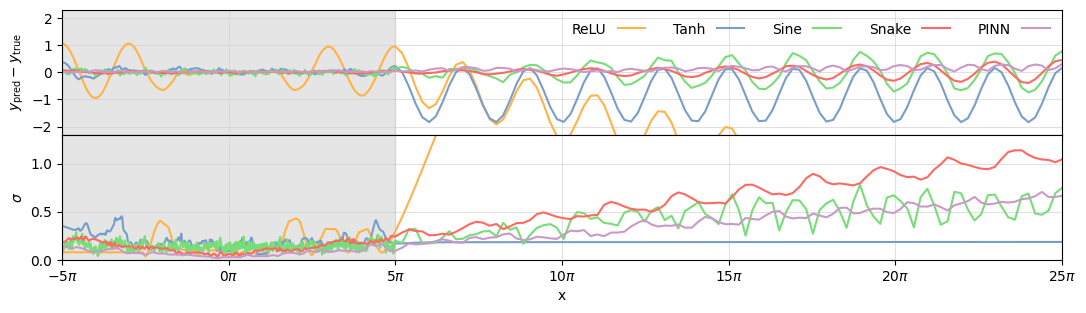

In [283]:
# Define model names and corresponding colors
models = ['ReLU', 'Tanh', 'Sine', 'Snake', 'PINN']
#models = ['Sine', 'Snake', 'PINN']
colors_model = colors[:4] + [colors[4]]


# Analytical solution
x_combined = np.concatenate([train_x_array, test_x_array])
y_analytical = np.cos(x_combined)
x_combined_pinn = np.concatenate([train_x_array_pinn, test_x_array])
y_analytical_pinn = oscillator(d, w0, torch.tensor(x_combined_pinn)).numpy()



# Compute combined losses and absolute differences
combined_losses = {}
abs_diff_means = {}
for model in models[:-1]:  # Exclude PINN for now
    combined_losses[model] = np.cumsum(
        (np.concatenate([mean.loc['Train', model], mean.loc['Test', model]]) - 
         np.concatenate([train_y_array, test_y_array]))**2
    )
    abs_diff_means[model] = np.abs(
        np.concatenate([mean.loc['Train', model], mean.loc['Test', model]]) - y_analytical
    )
    abs_diff_means[model] =  np.concatenate([mean.loc['Train', model], mean.loc['Test', model]]) - y_analytical
    

# For PINN separately
combined_losses['PINN'] = np.cumsum(
    (np.concatenate([mean.loc['Train', 'PINN'], mean.loc['Test', 'PINN']]) - 
     np.concatenate([train_y_array_pinn, test_y_array]))**2
)
abs_diff_means['PINN'] = np.abs(
    np.concatenate([mean.loc['Train', 'PINN'], mean.loc['Test', 'PINN']]) - y_analytical_pinn
)

# Plotting
fig, axes = plt.subplots(2, 1, figsize=(10, 2.5), sharex=True)

# Plot absolute difference for each model
for model, color in zip(models, colors_model):
    x_data = x_combined_pinn if model == 'PINN' else x_combined
    alpha = 1 if model in ['ReLU', 'Tanh'] else 1.0  # Apply alpha=0.5 for ReLU and Tanh
    axes[0].plot(x_data, abs_diff_means[model], label=model, color=color, alpha=alpha)

# Plot standard deviation for each model
for model, color in zip(models, colors_model):
    x_data = x_combined_pinn if model == 'PINN' else x_combined
    std_combined = np.concatenate([std.loc['Train', model], std.loc['Test', model]])
    alpha = 1 if model in ['ReLU', 'Tanh'] else 1.0  # Apply alpha=0.5 for ReLU and Tanh
    axes[1].plot(x_data, std_combined, label=model, color=color, alpha=alpha)

for ax in axes:
    ax.set_xlim(-5 * np.pi, 25 * np.pi)
    ax.set_xticks(np.arange(-5, 26, 5) * np.pi, labels=[f"${i}\pi$" for i in np.arange(-5, 26, 5)])
    ax.grid(True, color='lightgrey', linestyle='-', linewidth=0.5)
    ax.axvspan(-5 * np.pi, 5 * np.pi, color='grey', alpha=0.2)


# Labels and Legend
axes[0].set_ylabel('$y_{\mathrm{pred}} - y_{\mathrm{true}}$')
axes[0].set_ylim(-2.3, 2.3)
axes[0].set_yticks(np.arange(-2, 3, 1))

axes[1].set_xlabel('x')
axes[1].set_ylabel('$\sigma$')
axes[1].set_ylim(0, 1.3)
axes[0].legend(loc='upper right', frameon=False, ncol=5, markerfirst=False)

# Adjust layout and show plot
plt.subplots_adjust(hspace=0, wspace=0) 
plt.subplots_adjust(top=1, bottom=0, left=0, right=1)
plt.show()